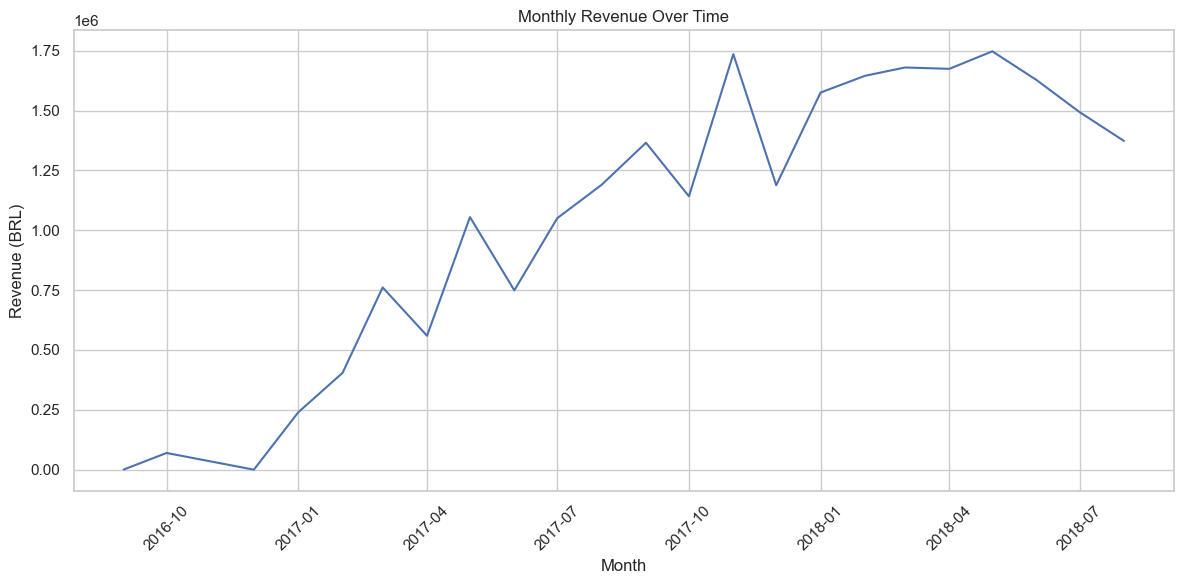

Average Order Value (AOV): BRL 167.02


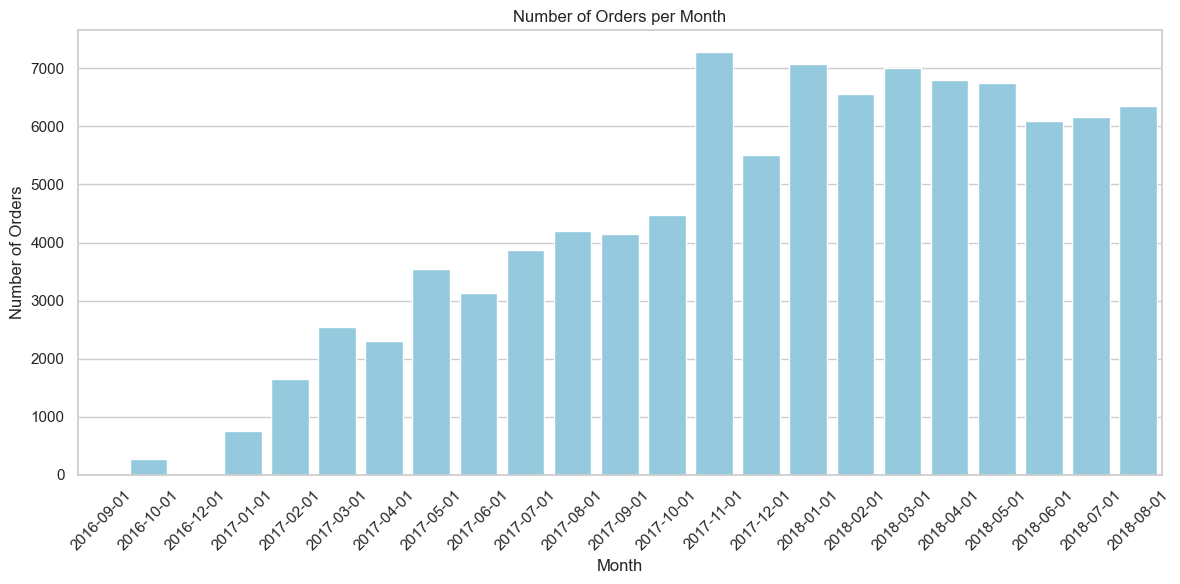

/var/folders/cs/z4wxmv2926jg0z28jhb3dtsr0000gn/T/ipykernel_16550/962926692.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_categories, y='product_category_name', x='order_total', palette='viridis')


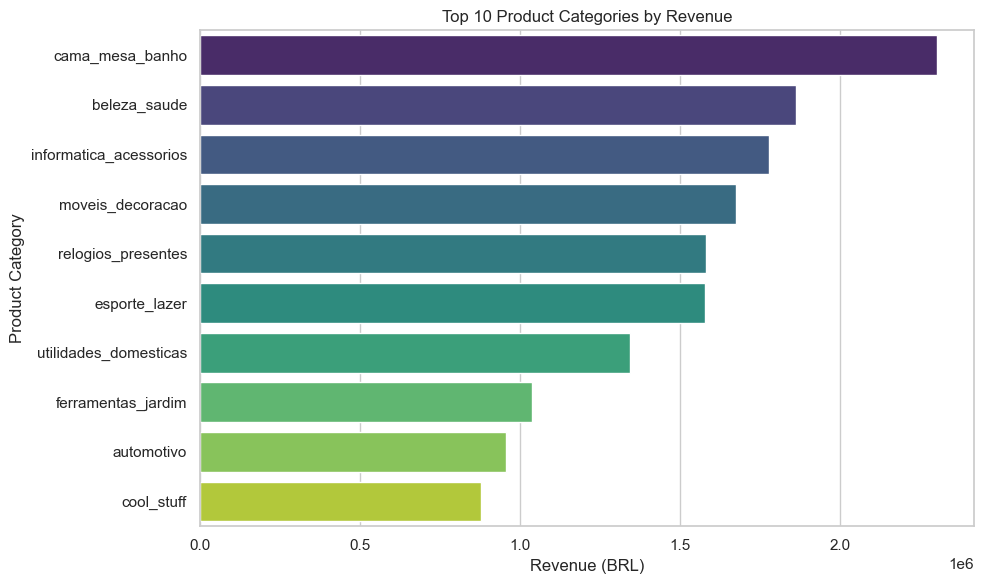

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(style="whitegrid")
data_path = Path("../data/processed/ecommerce_clean.csv")

# Load the cleaned data
df = pd.read_csv(data_path, parse_dates=['order_purchase_timestamp'])

# KPI 1: Total revenue over time (monthly)
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')
monthly_revenue = df.groupby('order_month')['order_total'].sum().reset_index()
monthly_revenue['order_month'] = monthly_revenue['order_month'].dt.to_timestamp()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_revenue, x='order_month', y='order_total')
plt.title("Monthly Revenue Over Time")
plt.ylabel("Revenue (BRL)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# KPI 2: Average Order Value (AOV)
aov = df.groupby('order_id')['order_total'].mean().mean()
print(f"Average Order Value (AOV): BRL {aov:.2f}")

# KPI 3: Number of orders per month
orders_per_month = df.groupby('order_month')['order_id'].nunique().reset_index()
orders_per_month['order_month'] = orders_per_month['order_month'].dt.to_timestamp()

plt.figure(figsize=(12,6))
sns.barplot(data=orders_per_month, x='order_month', y='order_id', color='skyblue')
plt.title("Number of Orders per Month")
plt.ylabel("Number of Orders")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# KPI 4: Top 10 Product Categories by Revenue
category_revenue = df.groupby('product_category_name')['order_total'].sum().reset_index()
top_categories = category_revenue.sort_values(by='order_total', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_categories, y='product_category_name', x='order_total', palette='viridis')
plt.title("Top 10 Product Categories by Revenue")
plt.xlabel("Revenue (BRL)")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()
